# ` Data Overview `

The dataset contains information about airline operations, including passenger and freight statistics by month, airline, and country. Below are the details of each column:

1. **Month**: The name of the month (e.g., Jan-85).

2. **Airline**: The name of the airline (e.g., Air China).

3. **Port_Country**: The country associated with the airport/port (e.g., China).

4. **Passengers_In**: Number of incoming passengers.

5. **Freight_In_(tonnes)**: Amount of incoming freight in tonnes.

6. **Mail_In_(tonnes)**: Amount of incoming mail in tonnes.

7. **Passengers_Out**: Number of outgoing passengers.

8. **Freight_Out_(tonnes)**: Amount of outgoing freight in tonnes.

9. **Mail_Out_(tonnes)**: Amount of outgoing mail in tonnes.

10. **Year**: Year of the recorded data.

11. **Month_num**: Numeric representation of the month (1 for January, 2 for February, etc.).



` `

# ` Importing Libraries and Data `

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# My Own Function
from HelperFunctions import *


In [2]:
Airlines = pd.read_csv('airline_portcountry.csv')
Airlines.head()

,Month,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num
0,Jan-85,Air Caledonie,New Caledonia,725,0.368,0.0,474,0.167,0.0,1985,1
1,Jan-85,Air China,China,1311,9.158,0.0,1232,2.587,0.0,1985,1
2,Jan-85,Air India,India,1423,44.823,0.0,970,6.708,0.0,1985,1
3,Jan-85,Air India,Singapore,501,10.583,0.0,306,124.966,0.0,1985,1
4,Jan-85,Air Nauru,Nauru,161,0.212,0.0,96,23.996,0.0,1985,1


` `

## ` Preprocessing `

In [3]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47543 entries, 0 to 47542
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 47543 non-null  object 
 1   Airline               47543 non-null  object 
 2   Port_Country          47543 non-null  object 
 3   Passengers_In         47543 non-null  int64  
 4   Freight_In_(tonnes)   47543 non-null  float64
 5   Mail_In_(tonnes)      47543 non-null  float64
 6   Passengers_Out        47543 non-null  int64  
 7   Freight_Out_(tonnes)  47543 non-null  float64
 8   Mail_Out_(tonnes)     47543 non-null  float64
 9   Year                  47543 non-null  int64  
 10  Month_num             47543 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 4.0+ MB


In [4]:
Airlines.isnull().sum()

Month                   0
Airline                 0
Port_Country            0
Passengers_In           0
Freight_In_(tonnes)     0
Mail_In_(tonnes)        0
Passengers_Out          0
Freight_Out_(tonnes)    0
Mail_Out_(tonnes)       0
Year                    0
Month_num               0
dtype: int64

In [5]:
Airlines.duplicated().sum()

0

In [6]:
#delete Month Column
Airlines.drop('Month', axis=1, inplace=True)
Airlines.head(1)

,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num
0,Air Caledonie,New Caledonia,725,0.368,0.0,474,0.167,0.0,1985,1


In [7]:
New_names = {'Port_Country':'Distination', 
             'Passengers_In':'ongoing_Passengers',
             'Passengers_Out':'outgoing_Passengers',
             'Freight_In_(tonnes)':'ongoing_Freight',
             'Freight_Out_(tonnes)':'outgoing_Freight',
             'Mail_In_(tonnes)':'ongoing_Mail',
             'Mail_Out_(tonnes)':'outgoing_Mail',
             'Month_num':'Month',
             }

rename_columns(Airlines, New_names)

In [8]:
print(Airlines.columns)

Index(['Airline', 'Distination', 'ongoing_Passengers', 'ongoing_Freight',
       'ongoing_Mail', 'outgoing_Passengers', 'outgoing_Freight',
       'outgoing_Mail', 'Year', 'Month'],
      dtype='object')


` `

## `General EDA `

In [9]:
# count values for each column 
def counts(df, columns: list = None):
    if columns is None:
        columns = df.columns
        print("no columns specified, using all columns")
    
    for column in columns:
        print(df[column].value_counts().head(10))
        print("\n")
        

counted_cols = Airlines[['Year', 'Distination']]
counts(Airlines, counted_cols)

Year
2024    1459
1996    1427
1997    1402
1999    1395
2023    1357
1998    1353
2018    1346
2019    1344
2011    1315
2012    1310
Name: count, dtype: int64


Distination
New Zealand         4839
Singapore           4074
USA                 3856
China               2436
Thailand            2434
Indonesia           2402
Japan               1745
Malaysia            1603
Fiji                1315
Papua New Guinea    1241
Name: count, dtype: int64




the starting year is 1985, and the ending year is 2024


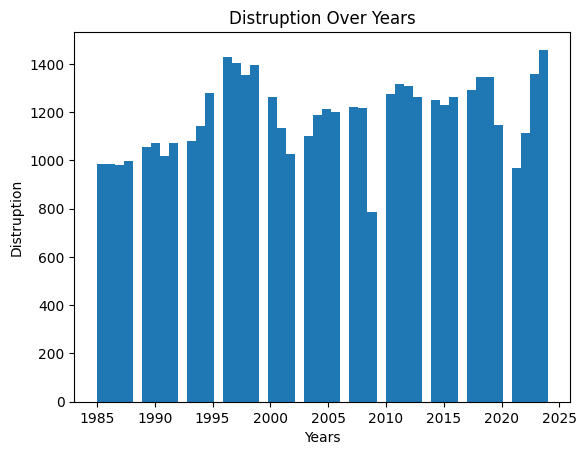

In [10]:
# Distruption in the data

print(f"the starting year is {Airlines['Year'].min()}, and the ending year is {Airlines['Year'].max()}")

Airlines['Year'].hist(bins = 50, grid = False)
plt.title('Distruption Over Years')
plt.xlabel('Years')
plt.ylabel('Distruption')
plt.show()

- `the Periods ( Between 1995 and 2000 ) specially 1996 and ( Between 2020 and 2025 ) specially 2024 have the most flights.`
- `Although that it is not and problem becuase i think there isn't a huge differences Over the years.`

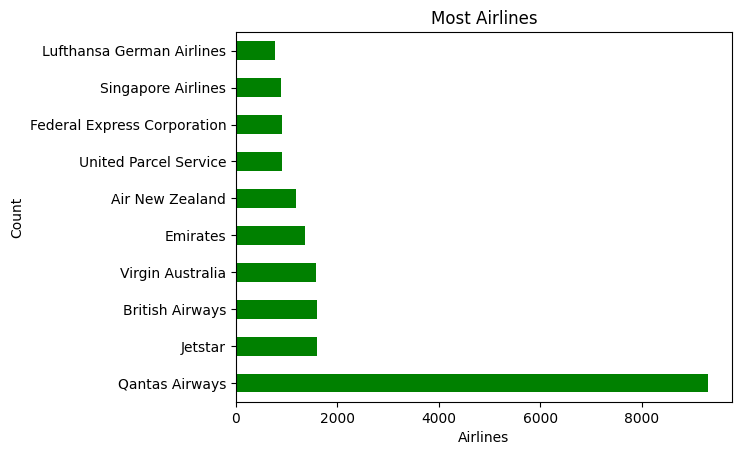

In [11]:
# most airline have Entries

most_airlines = Airlines['Airline'].value_counts().sort_values(ascending=False).head(10)
most_airlines.plot(kind='barh', color='green')
plt.title('Most Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()


- `Qantas Airways is the most Entities`

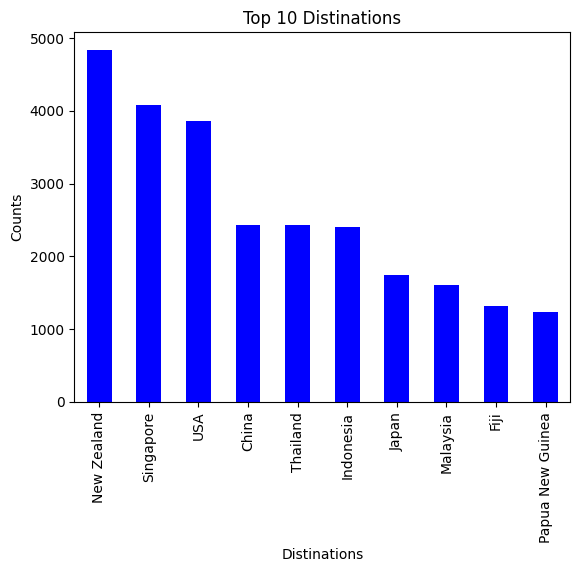

In [12]:
# The most common distenation

common_dist = Airlines['Distination'].value_counts().head(10)

common_dist.plot(kind = 'bar', color = 'blue')
plt.xlabel('Distinations')
plt.ylabel('Counts')
plt.title('Top 10 Distinations')
plt.show()

- `New Zealand is the most common Distenation`

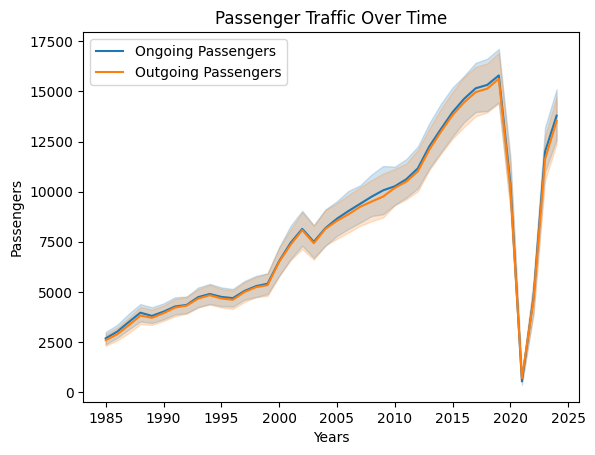

In [13]:
# overall trend in passenger traffic over time

# Drop the duplicated 'ongoing_Passengers' column
Airline = Airlines.loc[:, ~Airlines.columns.duplicated()]

sns.lineplot(x='Year', y='ongoing_Passengers', data=Airline, label='Ongoing Passengers')
sns.lineplot(x='Year', y='outgoing_Passengers', data=Airline, label='Outgoing Passengers')
plt.title('Passenger Traffic Over Time')
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.legend()
plt.show()

-`The trend was stable untill 2019 the curve of the trend suddenly dropped that is actually because of Covid-19 and that continued untill the beggening of 2021` 

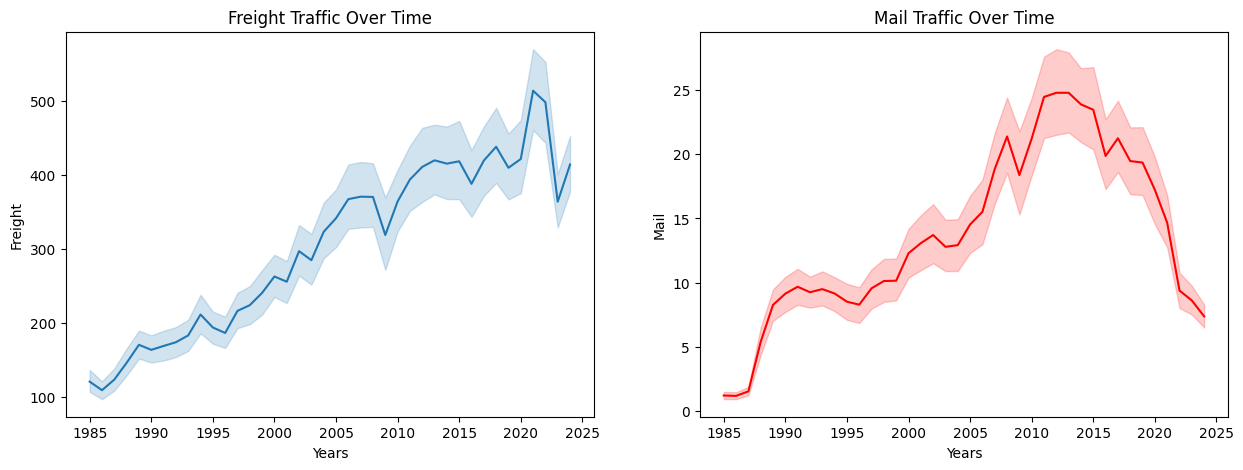

In [14]:
# freight and mail traffic distribution over time

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x='Year', y='ongoing_Freight', data=Airline, ax=ax[0])
ax[0].set_title('Freight Traffic Over Time')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Freight')

sns.lineplot(x='Year', y='ongoing_Mail', data=Airline, ax=ax[1], color='red')
ax[1].set_title('Mail Traffic Over Time')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Mail')

plt.show()


- ` the trend of freight is about normally stable , except the (2019, 2021) period thta is beacause Covid-19.`
- ` the trend of Mails get dropped from year 2013 and doesn't recovered until now.`

` `

# ` More Detailed EDA `

the maximum number of ongoing passengers is 171730 and the minimum is 0
the maximum number of outgoing passengers is 176739 and the minimum is 0


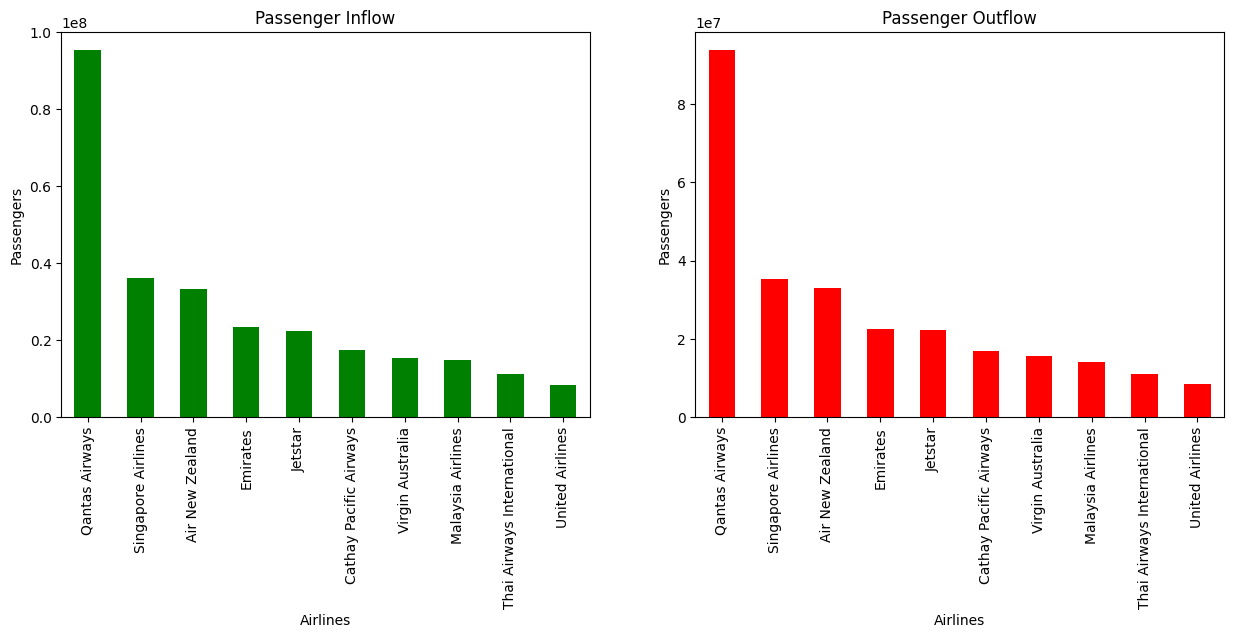

In [15]:
# airlines contribute the most to passenger inflow and outflow for 2020

print(f'the maximum number of ongoing passengers is {Airline["ongoing_Passengers"].max()} and the minimum is {Airline["ongoing_Passengers"].min()}')
print(f'the maximum number of outgoing passengers is {Airline["outgoing_Passengers"].max()} and the minimum is {Airline["outgoing_Passengers"].min()}')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Passenger Inflow
passenger_inflow = Airline.groupby('Airline')['ongoing_Passengers'].sum().sort_values(ascending=False).head(10)
passenger_inflow.plot(kind='bar', ax=ax[0], color='green')
ax[0].set_title('Passenger Inflow')
ax[0].set_xlabel('Airlines')
ax[0].set_ylabel('Passengers')

# Passenger Outflow
passenger_outflow = Airline.groupby('Airline')['outgoing_Passengers'].sum().sort_values(ascending=False).head(10)
passenger_outflow.plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Passenger Outflow')
ax[1].set_xlabel('Airlines')
ax[1].set_ylabel('Passengers')

plt.show()

- ` The Qantas Airways is the most airline way get entities and out them.`

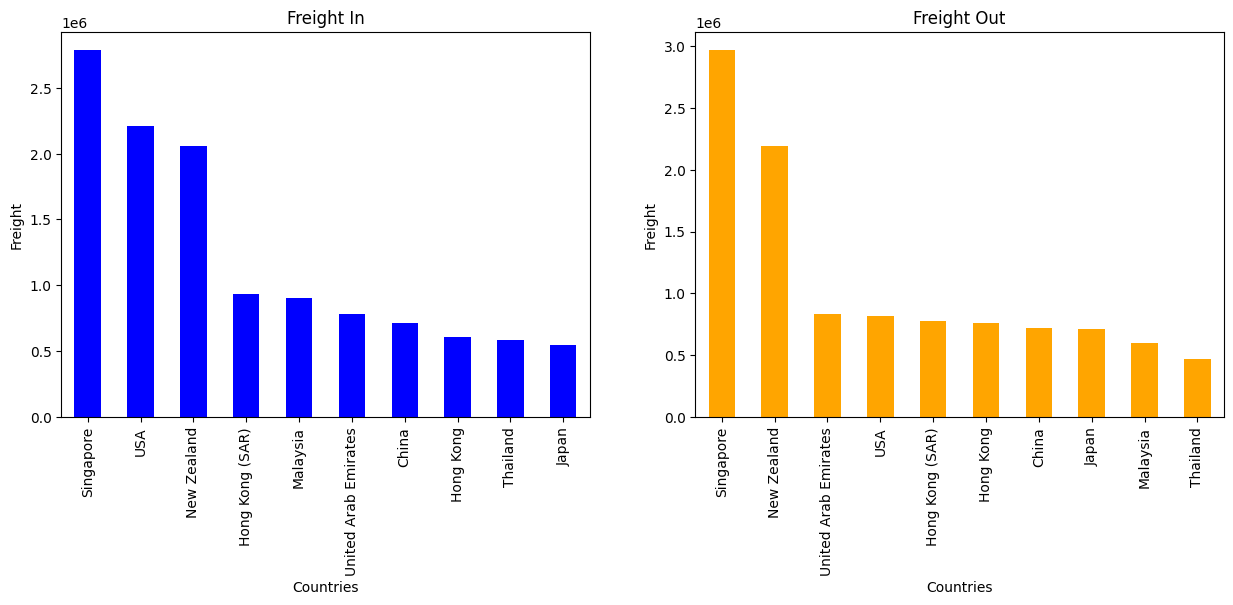

In [16]:
# top countries for freight movement (both in and out)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Freight In
freight_in = Airline.groupby('Distination')['ongoing_Freight'].sum().sort_values(ascending=False).head(10)
freight_in.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Freight In')
ax[0].set_xlabel('Countries')
ax[0].set_ylabel('Freight')

# Freight Out
freight_out = Airline.groupby('Distination')['outgoing_Freight'].sum().sort_values(ascending=False).head(10)
freight_out.plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Freight Out')
ax[1].set_xlabel('Countries')
ax[1].set_ylabel('Freight')

plt.show()

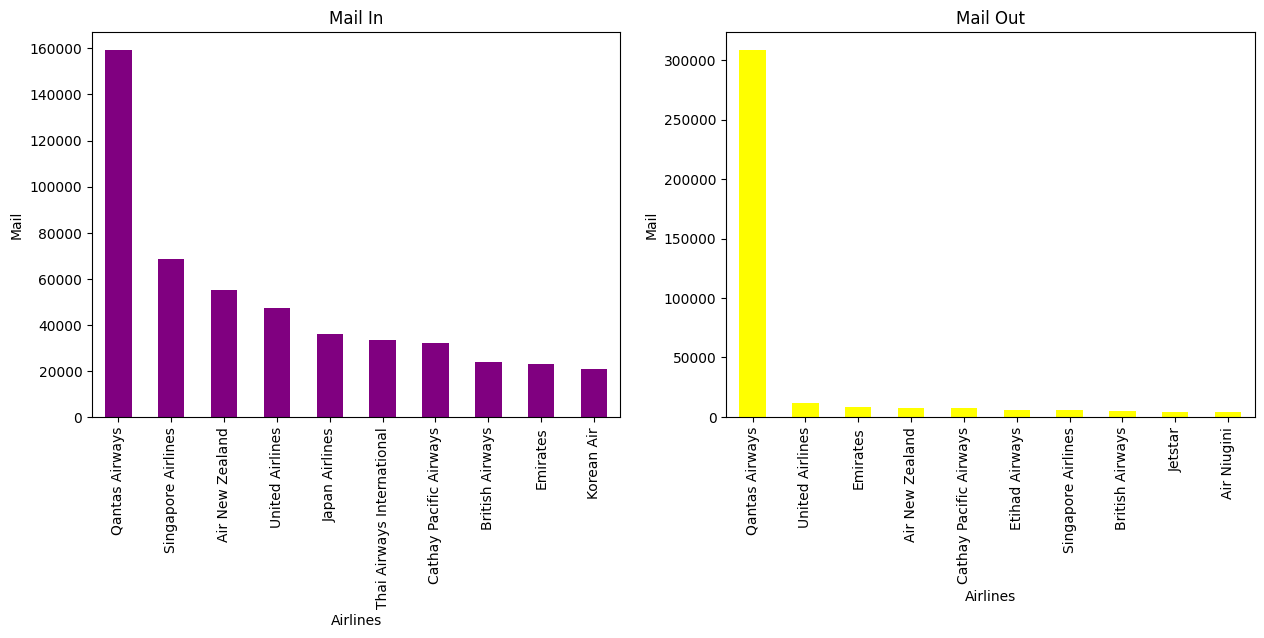

In [17]:
# incoming and outgoing mail volumes compare across different airlines

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Mail In
mail_in = Airline.groupby('Airline')['ongoing_Mail'].sum().sort_values(ascending=False).head(10)
mail_in.plot(kind='bar', ax=ax[0], color='purple')
ax[0].set_title('Mail In')
ax[0].set_xlabel('Airlines')
ax[0].set_ylabel('Mail')

# Mail Out
mail_out = Airline.groupby('Airline')['outgoing_Mail'].sum().sort_values(ascending=False).head(10)
mail_out.plot(kind='bar', ax=ax[1], color='yellow')
ax[1].set_title('Mail Out')
ax[1].set_xlabel('Airlines')
ax[1].set_ylabel('Mail')

plt.show()

- ` The Qantas Airways is the most Airline get and launch flights for different purposes.`
- ` excluding Qantas Airwaysm, I think based on high number of Mails-in in Sungapore Airlines that this line is the second line has recieve flights.`
- ` on the other hand excluding Qantas Airwaysm the United Airlines is the second Airline launched flights. ` 

#### ` Are there seasonal trends in passenger traffic for Qantas Airways and USA? `

In [18]:
airlines_data = Airlines[Airlines['Airline'] == 'Qantas Airways']

country_data = Airlines[Airlines['Distination'] == 'USA']

In [19]:
# for Qantas Airways airline

monthly_airlines_traffic = airlines_data.groupby('Month')[['ongoing_Passengers', 'outgoing_Passengers']].sum()


monthly_airlines_traffic['Total_Passengers'] = (
    monthly_airlines_traffic['ongoing_Passengers'] + monthly_airlines_traffic['outgoing_Passengers']
)

sorted_monthly_airlines_traffic = monthly_airlines_traffic.sort_index()
print(sorted_monthly_airlines_traffic)

       ongoing_Passengers  outgoing_Passengers  Total_Passengers
Month                                                           
1                 9429841              8415525          17845366
2                 7821293              7023993          14845286
3                 7754691              7993840          15748531
4                 7528544              7781752          15310296
5                 6824350              7319358          14143708
6                 7147124              7617091          14764215
7                 8925555              7843872          16769427
8                 7693166              8122872          15816038
9                 7678661              7742225          15420886
10                8655038              7373609          16028647
11                7714436              7659687          15374123
12                8114279              8846332          16960611


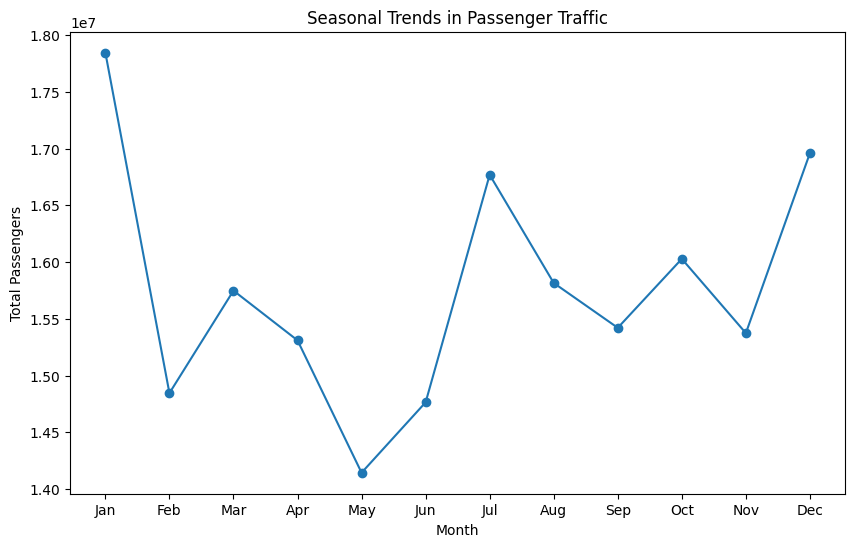

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_monthly_airlines_traffic.index, sorted_monthly_airlines_traffic['Total_Passengers'], marker='o')
plt.title('Seasonal Trends in Passenger Traffic')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

In [21]:
# for United States country

monthly_country_traffic = country_data.groupby('Month')[['ongoing_Passengers', 'outgoing_Passengers']].sum()

monthly_country_traffic['Total_Passengers'] = (
    monthly_country_traffic['ongoing_Passengers'] + monthly_country_traffic['outgoing_Passengers']
)

sorted_monthly_country_traffic = monthly_country_traffic.sort_index()
print(sorted_monthly_country_traffic)

       ongoing_Passengers  outgoing_Passengers  Total_Passengers
Month                                                           
1                 3328605              2846130           6174735
2                 2534683              2200618           4735301
3                 2422516              2804169           5226685
4                 2379042              2689669           5068711
5                 2418254              2640363           5058617
6                 2638690              2860137           5498827
7                 3106767              2861995           5968762
8                 2570806              2898733           5469539
9                 2653947              2738796           5392743
10                3062312              2442106           5504418
11                2569207              2508573           5077780
12                2715918              3030043           5745961


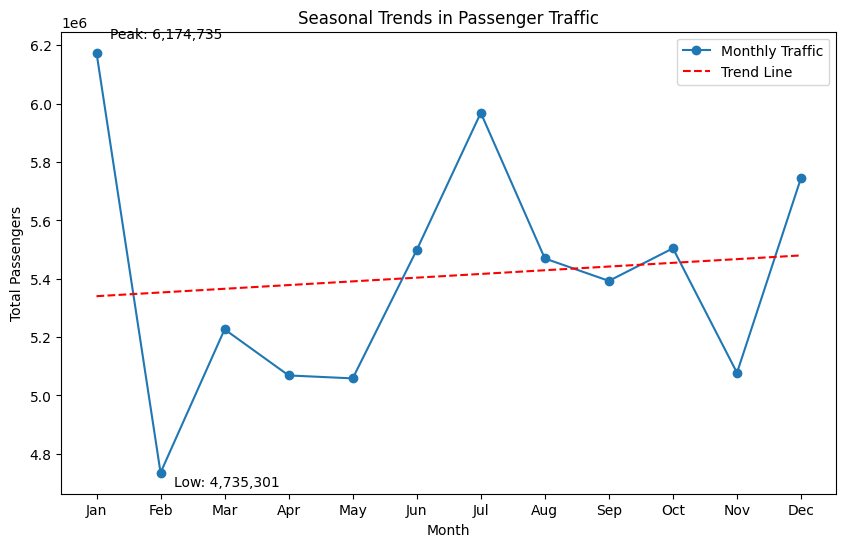

In [22]:
plt.figure(figsize=(10, 6))

# Original plot
plt.plot(sorted_monthly_country_traffic.index, sorted_monthly_country_traffic['Total_Passengers'], 
         marker='o', label='Monthly Traffic')

# Add trend line
z = np.polyfit(sorted_monthly_country_traffic.index, sorted_monthly_country_traffic['Total_Passengers'], 1) # degree of the polynomial
p = np.poly1d(z)

plt.plot(sorted_monthly_country_traffic.index, p(sorted_monthly_country_traffic.index), 
         "r--", label='Trend Line')

# Add annotations for max and min points
max_point = sorted_monthly_country_traffic['Total_Passengers'].max()
min_point = sorted_monthly_country_traffic['Total_Passengers'].min()
max_month = sorted_monthly_country_traffic.index[sorted_monthly_country_traffic['Total_Passengers'].argmax()]
min_month = sorted_monthly_country_traffic.index[sorted_monthly_country_traffic['Total_Passengers'].argmin()]

plt.annotate(f'Peak: {max_point:,.0f}', 
            (max_month, max_point), 
            xytext=(10, 10), 
            textcoords='offset points')

plt.annotate(f'Low: {min_point:,.0f}', 
            (min_month, min_point), 
            xytext=(10, -10), 
            textcoords='offset points')

plt.title('Seasonal Trends in Passenger Traffic')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()

plt.show()

### ` Which countries experience the highest growth in air traffic over time? `

In [23]:
country_yearly_traffic = Airlines.groupby(['Year', 'Distination'])[['ongoing_Passengers', 'outgoing_Passengers']].sum()
country_yearly_traffic['Total_Passengers'] = (
    country_yearly_traffic['ongoing_Passengers'] + country_yearly_traffic['outgoing_Passengers']
)

country_yearly_traffic = country_yearly_traffic.reset_index()
country_yearly_traffic['Growth'] = (
    country_yearly_traffic.groupby('Distination')['Total_Passengers'].pct_change()
)

average_growth = country_yearly_traffic.groupby('Distination')['Growth'].mean().sort_values(ascending=False)

average_growth.replace([np.inf, -np.inf], np.nan, inplace=True)
average_growth.dropna(inplace=True)

average_growth.head(10)


Distination
Canada           77.451424
Palau            75.500000
Western Samoa     4.895975
Switzerland       3.572459
Fiji              3.215819
Niue              3.088542
Chile             2.039504
Thailand          1.765065
Indonesia         1.656638
Sri Lanka         1.645363
Name: Growth, dtype: float64

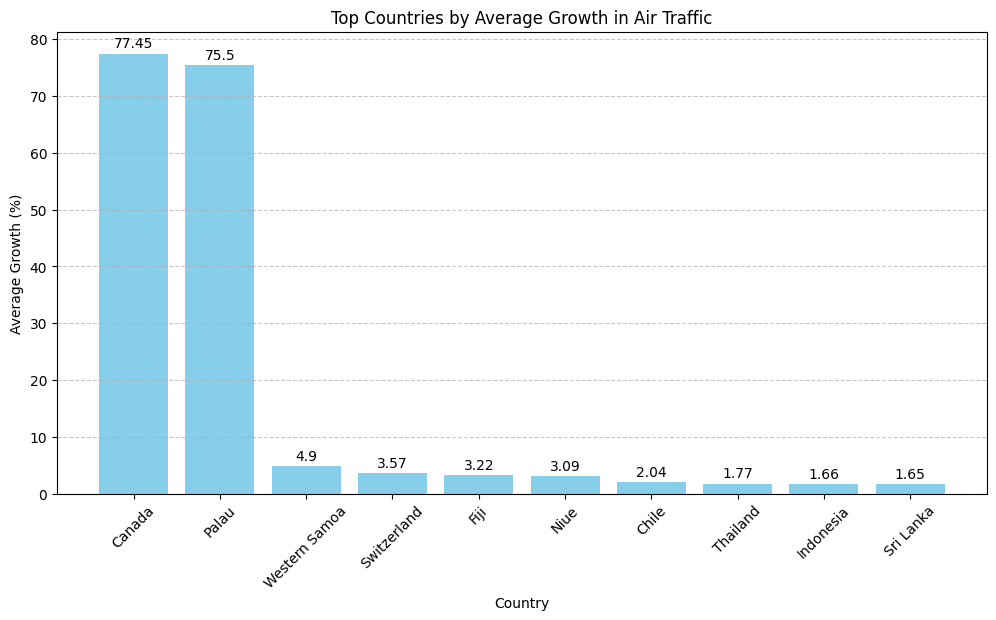

In [24]:
# Bar chart for average growth
top_countries = average_growth.head(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='skyblue')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.title('Top Countries by Average Growth in Air Traffic')
plt.xlabel('Country')
plt.ylabel('Average Growth (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

` `

# ` Business Questions `

#### 1 - ` Which airline has the highest overall passenger traffic? `

In [25]:
# Rank airlines based on total passenger traffic.

highest_airlines = Airlines.groupby('Airline')[['ongoing_Passengers', 'outgoing_Passengers']].sum()

highest_airlines['Total_passengers'] = highest_airlines['ongoing_Passengers'] + highest_airlines['outgoing_Passengers']

highest_airlines = highest_airlines.sort_values(by='Total_passengers', ascending=False).reset_index().head(10)

highest_airlines



,Airline,ongoing_Passengers,outgoing_Passengers,Total_passengers
0,Qantas Airways,95286978,93740156,189027134
1,Singapore Airlines,36061248,35170061,71231309
2,Air New Zealand,33324258,33066918,66391176
3,Emirates,23317765,22564827,45882592
4,Jetstar,22338672,22236461,44575133
5,Cathay Pacific Airways,17320403,16845464,34165867
6,Virgin Australia,15404582,15602207,31006789
7,Malaysia Airlines,14732384,14175585,28907969
8,Thai Airways International,11152417,10869121,22021538
9,United Airlines,8411087,8511957,16923044


C:\Users\boham\AppData\Local\Temp\ipykernel_1988\2691055708.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


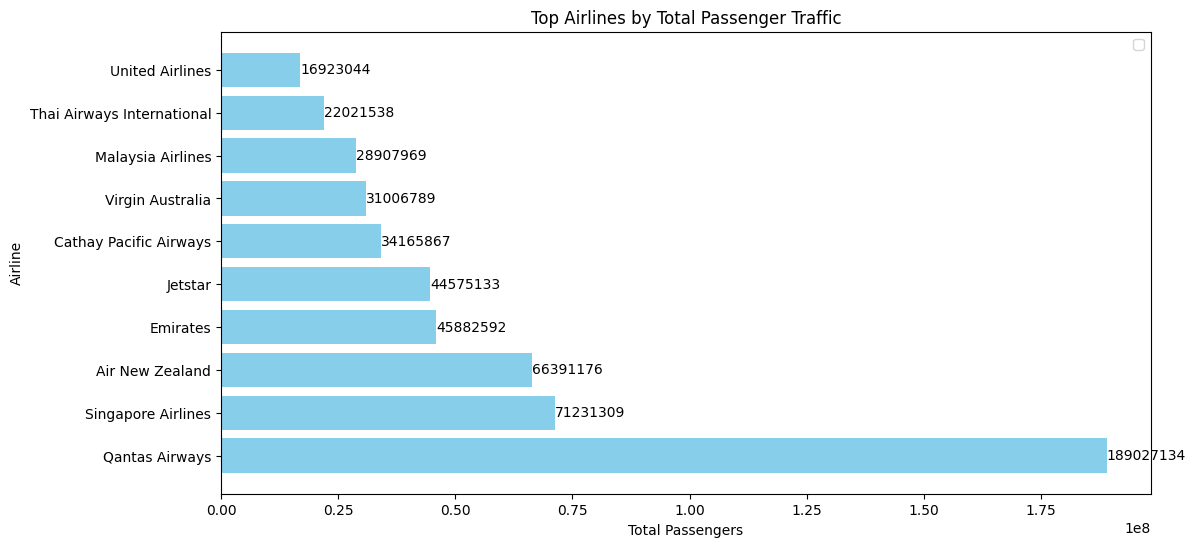

In [26]:
plt.figure(figsize=(12, 6))
bars = plt.barh(highest_airlines['Airline'], highest_airlines['Total_passengers'], color='skyblue')

# Add data labels

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, round(yval, 2), va='center')


plt.title('Top Airlines by Total Passenger Traffic')
plt.xlabel('Total Passengers')
plt.ylabel('Airline')
plt.legend()
plt.show()

#### 2- ` What is the yearly trend in freight movement for the top 5 countries? `

In [27]:
top_countries = Airlines.groupby('Distination')[['ongoing_Freight', 'outgoing_Freight']].sum()
top_countries['Total_Freight'] = top_countries['ongoing_Freight'] + top_countries['outgoing_Freight']
top_countries = top_countries.sort_values(by='Total_Freight', ascending=False).head().index

# Filter top 5 countries to get each one's performance over all years
top_countries_data = Airlines[Airlines['Distination'].isin(top_countries)]

# top_countries_data['Distination'].unique()   # checking for the top 5 countries

# Group by Year and Distination
Each_Yearly_Freight = top_countries_data.groupby(['Year', 'Distination'])[['ongoing_Freight', 'outgoing_Freight']].sum()
Each_Yearly_Freight['Total_Freight'] = Each_Yearly_Freight['ongoing_Freight'] + Each_Yearly_Freight['outgoing_Freight']

Each_Yearly_Freight = Each_Yearly_Freight.reset_index()

Each_Yearly_Freight

,Year,Distination,ongoing_Freight,outgoing_Freight,Total_Freight
0,1985,New Zealand,31532.763,22031.588,53564.351
1,1985,Singapore,12255.558,26259.741,38515.299
2,1985,USA,19282.684,9654.621,28937.305
3,1985,United Arab Emirates,149.042,4422.258,4571.300
4,1986,New Zealand,24806.103,30304.243,55110.346
...,...,...,...,...,...
172,2024,Hong Kong (SAR),64769.662,41369.418,106139.080
173,2024,New Zealand,47078.892,54358.635,101437.527
174,2024,Singapore,128567.397,99923.652,228491.049
175,2024,USA,73562.180,37154.398,110716.578


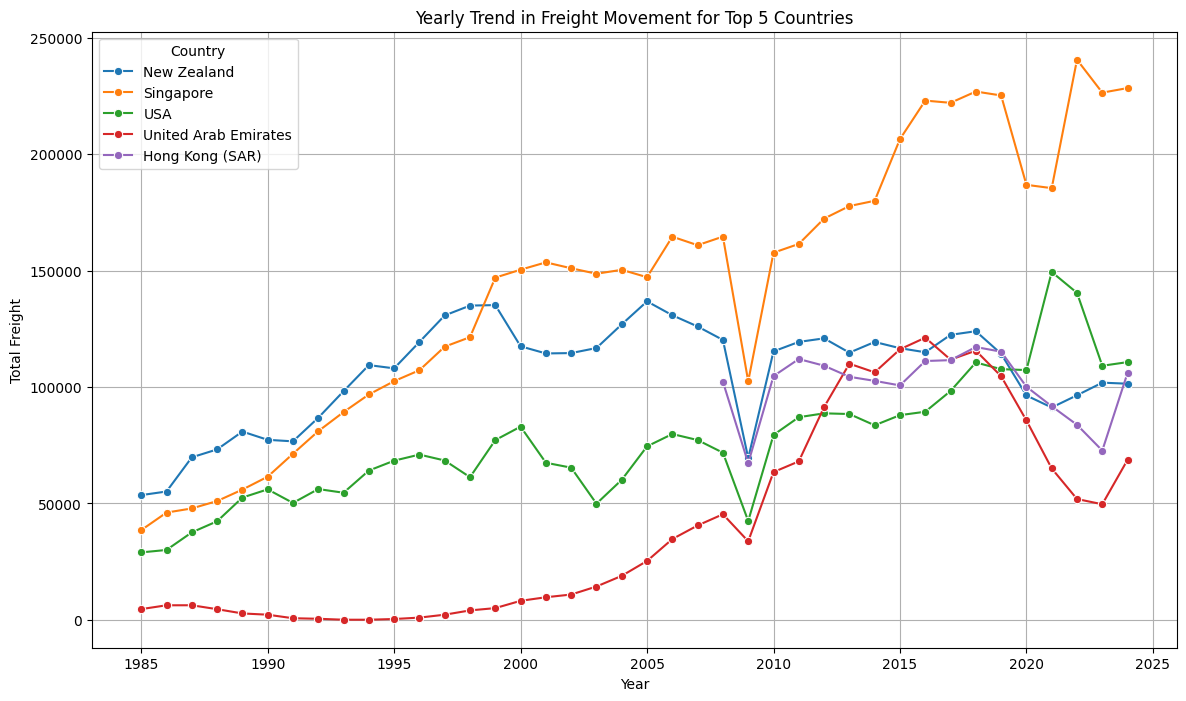

In [28]:
# Plot the trends using line graphs
plt.figure(figsize=(14, 8))

sns.lineplot(data=Each_Yearly_Freight, x='Year', y='Total_Freight', hue='Distination', marker='o')
plt.title('Yearly Trend in Freight Movement for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Total Freight')
plt.legend(title='Country')
plt.grid(True)
plt.show()

#### 3- ` Which months have the highest traffic for specific airlines? `

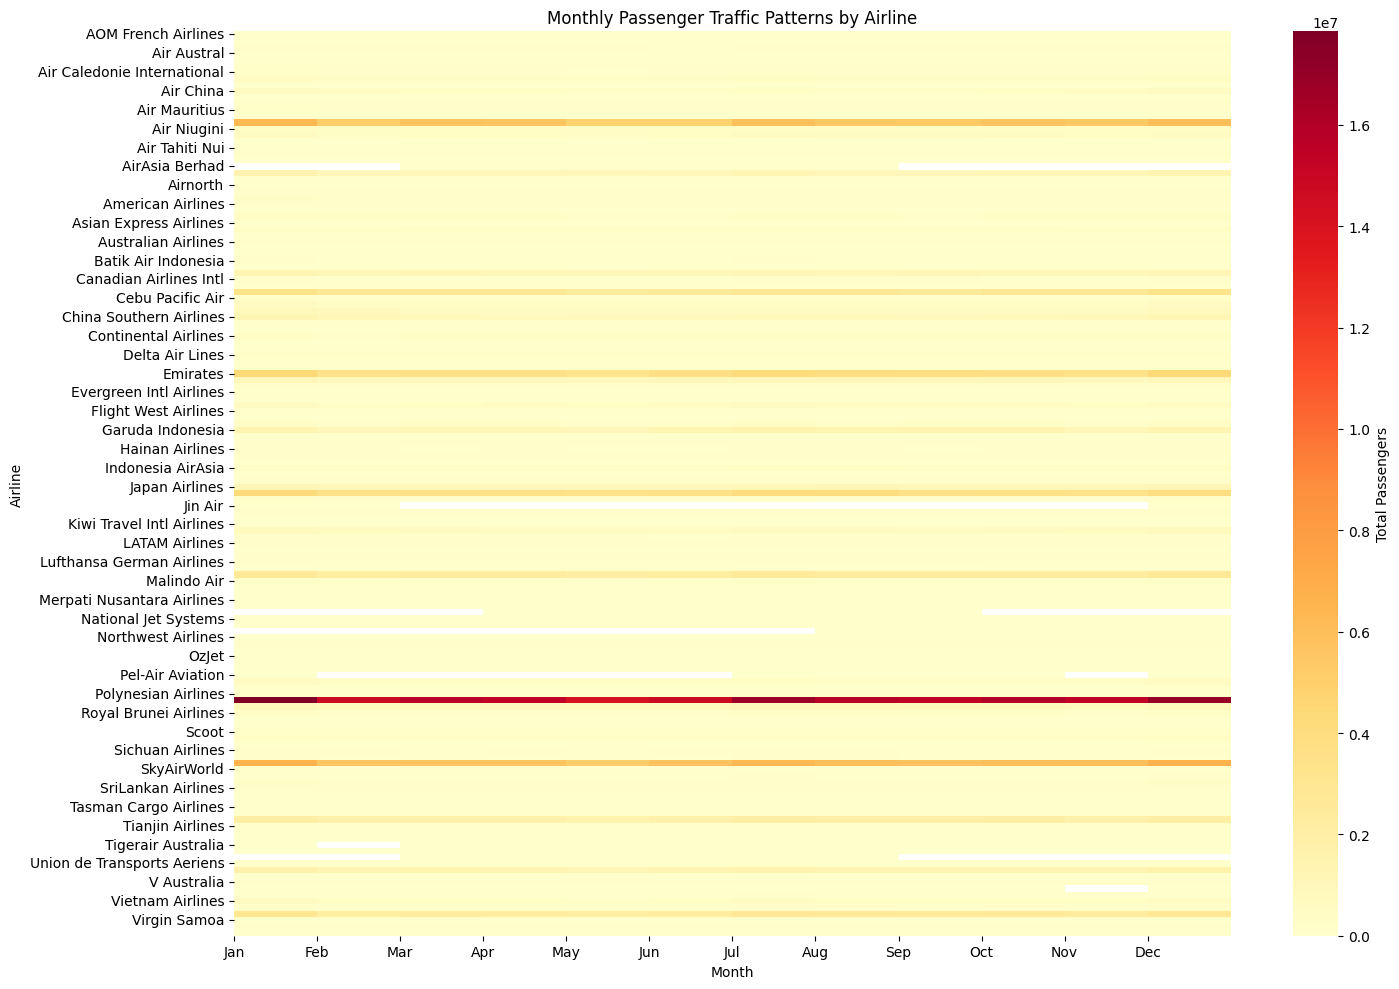

In [29]:
# Group the data by Airline and Month, aggregating passenger counts
monthly_traffic = Airline.groupby(['Airline', 'Month'])[['ongoing_Passengers', 'outgoing_Passengers']].sum()
monthly_traffic['Total_Passengers'] = monthly_traffic['ongoing_Passengers'] + monthly_traffic['outgoing_Passengers']
monthly_traffic = monthly_traffic.sort_values(by='Total_Passengers', ascending=False).reset_index()

# Create a pivot table for monthly traffic patterns
pivot_traffic = monthly_traffic.pivot(index='Airline', columns='Month', values='Total_Passengers')

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_traffic, cmap='YlOrRd', 
            annot=False, fmt='.0f', 
            cbar_kws={'label': 'Total Passengers'})
plt.title('Monthly Passenger Traffic Patterns by Airline')
plt.xlabel('Month')
plt.ylabel('Airline')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
#

#### 4- ` How does passenger traffic correlate with freight and mail movement? `

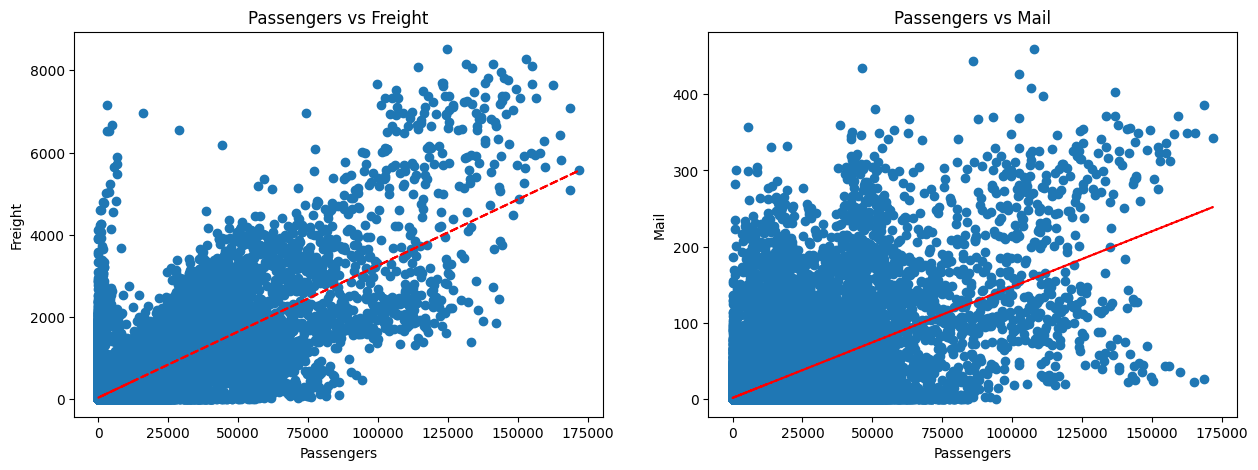

In [33]:
Pass_Fre_corr = Airlines[['ongoing_Passengers', 'ongoing_Freight']]
Pass_Mail_corr = Airlines[['ongoing_Passengers', 'ongoing_Mail']]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Passengers vs Freight
## making a plot line 
z = np.polyfit(Pass_Fre_corr['ongoing_Passengers'], Pass_Fre_corr['ongoing_Freight'], 1)
p = np.poly1d(z)

ax[0].scatter(Pass_Fre_corr['ongoing_Passengers'], Pass_Fre_corr['ongoing_Freight'])
ax[0].plot(Pass_Fre_corr['ongoing_Passengers'], p(Pass_Fre_corr['ongoing_Passengers']), "r--")
ax[0].set_title('Passengers vs Freight')
ax[0].set_xlabel('Passengers')
ax[0].set_ylabel('Freight')


# Passengers vs Mail
## making a plot line
z = np.polyfit(Pass_Mail_corr['ongoing_Passengers'], Pass_Mail_corr['ongoing_Mail'], 1)
p = np.poly1d(z)

ax[1].scatter(Pass_Mail_corr['ongoing_Passengers'], Pass_Mail_corr['ongoing_Mail'])
ax[1].plot(Pass_Mail_corr['ongoing_Passengers'], p(Pass_Mail_corr['ongoing_Passengers']), "r--")
ax[1].set_title('Passengers vs Mail')
ax[1].set_xlabel('Passengers')
ax[1].set_ylabel('Mail')

plt.show()


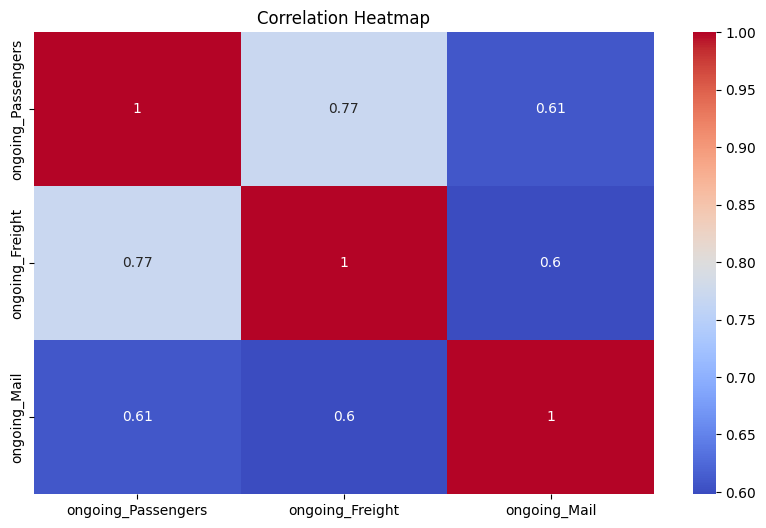

In [35]:
#KNowing the correlation between the columns using heatmap

pass_fre_mail = Airlines[['ongoing_Passengers', 'ongoing_Freight', 'ongoing_Mail']]

correlation = Airlines[['ongoing_Passengers', 'ongoing_Freight', 'ongoing_Mail']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### 5- ` What are the busiest routes for the top 3 airlines? `

In [42]:
# Filter the data for the top 3 airlines based on total passenger traffic.
# Group by Port_Country and calculate total passenger traffic for each route.
# Visualize the busiest routes using a bar chart.

Data_for_total_passengers = Airlines.groupby('Airline')[['ongoing_Passengers', 'outgoing_Passengers']].sum()
Data_for_total_passengers['total_passengers'] = Data_for_total_passengers['ongoing_Passengers'] + Data_for_total_passengers['outgoing_Passengers']

top_3_airlines = Data_for_total_passengers.sort_values(by='total_passengers', ascending=False).head(3).index

top_3_airlines_data = Airlines[Airlines['Airline'].isin(top_3_airlines)]

top_3_airlines_data['Airline'].value_counts()

Airline
Qantas Airways        9315
Air New Zealand       1178
Singapore Airlines     893
Name: count, dtype: int64

C:\Users\boham\AppData\Local\Temp\ipykernel_1988\672593894.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


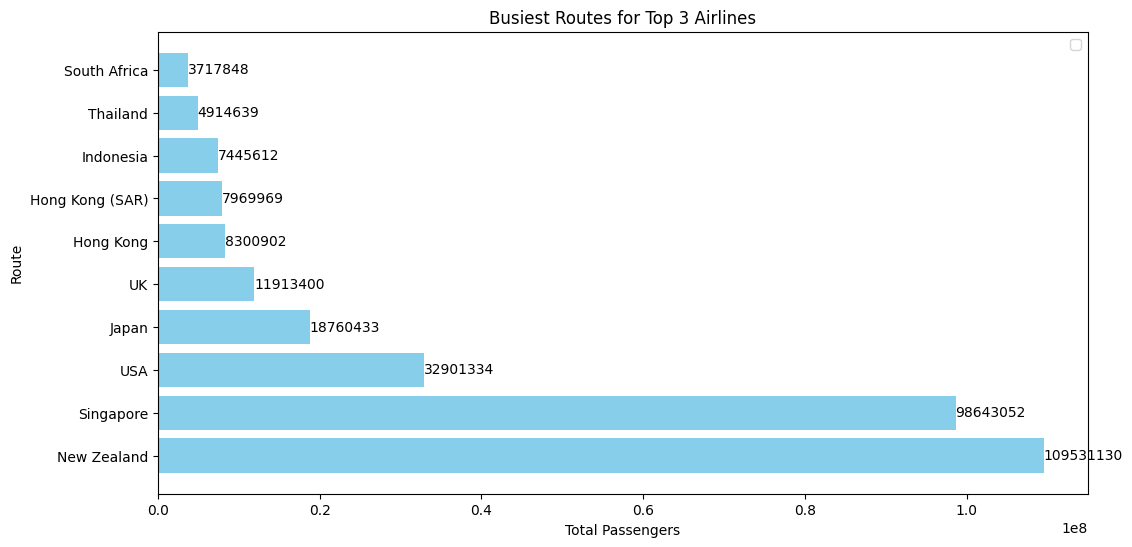

In [41]:
route_passengers = top_3_airlines_data.groupby('Distination')[['ongoing_Passengers', 'outgoing_Passengers']].sum()
route_passengers['total_passengers'] = route_passengers['ongoing_Passengers'] + route_passengers['outgoing_Passengers']

# Sort the routes by total passenger traffic
route_passengers = route_passengers.sort_values(by='total_passengers', ascending=False).head(10)

# Plot the busiest routes
plt.figure(figsize=(12, 6))
bars = plt.barh(route_passengers.index, route_passengers['total_passengers'], color='skyblue')

# Add data labels
for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, round(yval, 2), va='center')
    
plt.title('Busiest Routes for Top 3 Airlines')
plt.xlabel('Total Passengers')
plt.ylabel('Route')
plt.legend()
plt.show()

#### 6- ` Which airline has the most balanced inbound and outbound operations? `

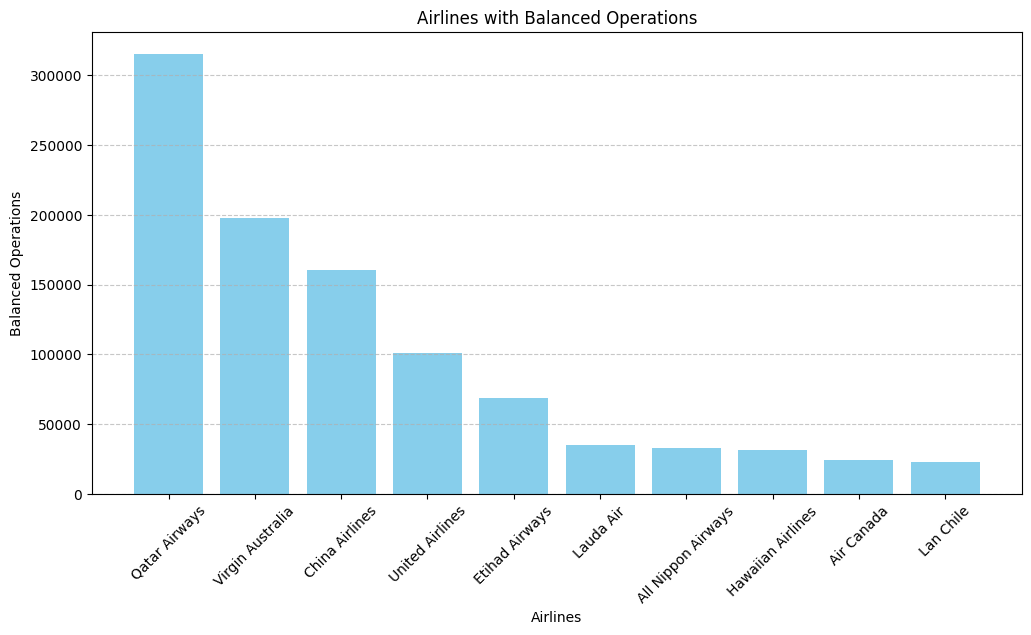

In [51]:
# Calculate the difference between Passengers_In and Passengers_Out for each airline.
# Rank airlines based on the smallest absolute difference.
# Highlight airlines with balanced operations.

balanced_Airlines = Airline.groupby('Airline')[['ongoing_Passengers', 'outgoing_Passengers']].sum()

# use abosulte value to get the difference
balanced_Airlines['balanced_operations'] = balanced_Airlines['ongoing_Passengers'] - balanced_Airlines['outgoing_Passengers']

balanced_Airlines = balanced_Airlines.sort_values(by='balanced_operations', ascending=True).head(10)

# plot balanced operations
plt.figure(figsize=(12, 6))

plt.bar(balanced_Airlines.index, -balanced_Airlines['balanced_operations'], color='skyblue') # negative values to show the difference
plt.title('Airlines with Balanced Operations')
plt.xlabel('Airlines')
plt.ylabel('Balanced Operations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


` `

# ` Thank You `